In [1]:
from datetime import datetime
from pprint import pprint
import json

import matplotlib.pyplot as plt
import requests

%matplotlib nbagg

In [2]:
url = 'https://uvdata.arpansa.gov.au/api/uvlevel/?longitude=138.62&latitude=-34.92&date=2018-10-07'

In [3]:
data = json.loads(requests.get(url).text)
pprint(data)

{'$id': '1',
 'CurrentDateTime': '07-10-2018 19:59',
 'CurrentUVIndex': '0.0',
 'GraphData': [{'$id': '2',
                'Date': '2018-10-07 06:00',
                'Forecast': None,
                'Measured': 0.009021648},
               {'$id': '3',
                'Date': '2018-10-07 06:01',
                'Forecast': None,
                'Measured': 0.009021648},
               {'$id': '4',
                'Date': '2018-10-07 06:02',
                'Forecast': None,
                'Measured': 0.009015514},
               {'$id': '5',
                'Date': '2018-10-07 06:03',
                'Forecast': None,
                'Measured': 0.009031598},
               {'$id': '6',
                'Date': '2018-10-07 06:04',
                'Forecast': None,
                'Measured': 0.009005475},
               {'$id': '7',
                'Date': '2018-10-07 06:05',
                'Forecast': None,
                'Measured': 0.009013564},
               {'$id': '8',
     

In [4]:
len(data['GraphData'])

840

In [5]:
def unzip(graph_data_series):
    dates = []
    forecast = []
    observed = []
    for item in graph_data_series:
        dates.append(datetime.strptime(item['Date'], '%Y-%m-%d %H:%M'))
        forecast.append(item['Forecast'])
        observed.append(item['Measured'])
    return {
        'dates': dates,
        'forecast': forecast,
        'observed': observed
    }

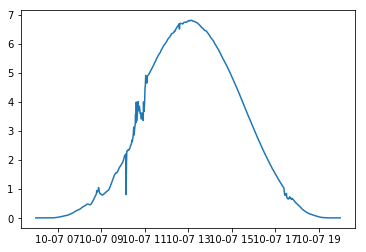

In [6]:
series = unzip(data['GraphData'])
plt.plot(series['dates'], series['observed'])
plt.plot(series['dates'], series['forecast'])

In [7]:
REQUEST_URL = 'https://uvdata.arpansa.gov.au/api/uvlevel/?longitude={lon:.2f}&latitude={lat:.2f}&date={date}'

def uvlevel(lon, lat, date=None):
    if date is None:
        date = datetime.today()
    datasource = json.loads(requests.get(REQUEST_URL.format(lon=lon, lat=lat, date=date.strftime('%Y-%m-%d'))).text)
    data = unzip(datasource['GraphData'])
    data['datasource'] = datasource
    return data

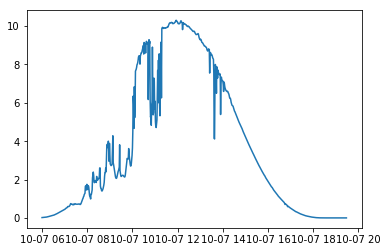

In [8]:
data = uvlevel(144, -20)
fig = plt.figure()
plt.plot(data['dates'], data['observed'])
plt.plot(data['dates'], data['forecast'])

In [9]:
data['datasource'].keys()

dict_keys(['$id', 'GraphData', 'TableData', 'CurrentDateTime', 'CurrentUVIndex', 'MaximumUVLevel', 'MaximumUVLevelDateTime'])

It's not great, beacause we don't know where the observed data comes from. The nearest site, obviously - but where is that?

In [10]:
url = 'https://uvdata.arpansa.gov.au/api/uvlevel/?longitude=138.62&latitude=-34.92&date=2018-10-05'
data = json.loads(requests.get(url).text)
pprint(data)

{'$id': '1',
 'CurrentDateTime': '05-10-2018 19:59',
 'CurrentUVIndex': '0.0',
 'GraphData': [{'$id': '2',
                'Date': '2018-10-05 06:00',
                'Forecast': 0.081164,
                'Measured': 0.02924806},
               {'$id': '3',
                'Date': '2018-10-05 06:01',
                'Forecast': 0.082088,
                'Measured': 0.03086652},
               {'$id': '4',
                'Date': '2018-10-05 06:02',
                'Forecast': 0.083116,
                'Measured': 0.03271641},
               {'$id': '5',
                'Date': '2018-10-05 06:03',
                'Forecast': 0.084248,
                'Measured': 0.03470523},
               {'$id': '6',
                'Date': '2018-10-05 06:04',
                'Forecast': 0.085488,
                'Measured': 0.03680253},
               {'$id': '7',
                'Date': '2018-10-05 06:05',
                'Forecast': 0.086832,
                'Measured': 0.03914201},
               